In [150]:
# ### setup ###
import nanovnacmd as nv
import numpy as np
import matplotlib.pyplot as plt
import serial
from time import sleep
#connect to the nanovna
vna = nv.connect()

In [151]:
# ### calibration ###
# #calculate the frequency range for the tdr lab
# #use a frequency range with 101 steps (102 when including the extrapolated DC value)
startFreq = 2.1e9 #1.0e9
stopFreq = 2.5e9 #3.0e9
fwithDC = np.linspace(startFreq,stopFreq,102)

# #set the frequencies
vna.setSweep(fwithDC[1],fwithDC[-1])

# #1 port calibration - short, open, load
calibration = nv.calibrate1port(vna)
# # #2 port calibration - short, open, load, through, isolation (cap the two lines w/ 50 ohms)
# # calibration = nv.calibrate2port(vna)

Short
Open
Load
Done


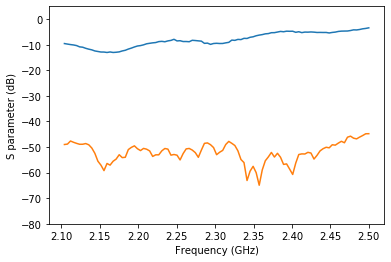

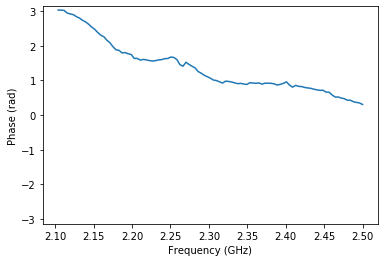

In [152]:
# ### frequency domain measurement #### 
# #take a measurement using the calibration object
f,s11,s21 = nv.measure(vna,calibration)

# #take a measurement without calibration
# f,s11,s21 = nv.measure(vna,nv.Calibration())

# #plot the measurement
plt.plot(f/1e9,20*np.log10(np.abs(s11)),label='S11')
plt.plot(f/1e9,20*np.log10(np.abs(s21)),label='S21')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S parameter (dB)')
plt.ylim(-80,5)
plt.show()

plt.plot(f/1e9,np.angle(s11),label='S11')
# plt.plot(f/1e9,np.angle(s21),label='S21')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase (rad)')
plt.ylim(-np.pi,np.pi)
plt.show()

In [169]:
def measure(vna,calibration):
	'''Measure the complex s parameters, requires the vna
	object and the calibration object as arguments'''

	##TODO: i want this to handle electrical delay properly.

	frequencies = vna.readFrequencies()
	values11 = vna.readValues('data 0')
	values21 = vna.readValues('data 1')
	data = nv.updateData(calibration,frequencies, values11, values21)


	s11 = np.array([d.z for d in data[0]])
	s21 = np.array([d.z for d in data[1]])
	f = np.array([d.freq for d in data[0]])

	return f, s11, s21

In [170]:
f_vals = []
s11_vals = []
s21_vals = []

run = True
debug = True
delay = 0.05 #0.05

outputCOMPort = "/dev/cu.usbmodem14101"
baudRate = 115200
ser = serial.Serial(outputCOMPort, baudRate)

while run:
    f, s11, s21 = measure(vna, calibration)
    min_index = np.argmin(np.abs(s11))
    #max_index = np.argmax(np.abs(s21))
    avg_s21 = np.mean(np.abs(s21))
    
    s21_vals = np.append(s21_vals, [avg_s21])
    
    s_mag = 10000
    s11_scaled = int(np.abs(s11[max_index]) * s_mag)
    s21_scaled = int(np.abs(avg_s21) * s_mag)   #int(np.abs(s21[max_index]) * s_mag)
    data = str(s21_scaled) + ";"
    ser.write(str.encode(data))
    
    if debug:
        print("S21:", avg_s21)
        # print("S21 maximum at", f[max_index], np.abs(s11[max_index]), np.abs(s21[max_index]), "at index", max_index)
        # print("Scaled S21 maximum at", f[max_index], s11_scaled, s21_scaled)
        # print()
        
    sleep(delay)

S21 maximum at 2500000000 0.8550661954320112 0.0049162192225029565 at index 100
Scaled S21 maximum at 2500000000 8550 68

S21 maximum at 2500000000 0.8844439451893218 0.007745403214252405 at index 100
Scaled S21 maximum at 2500000000 8844 122

S21 maximum at 2500000000 0.8091403568475313 0.005867480049669423 at index 100
Scaled S21 maximum at 2500000000 8091 117

S21 maximum at 2500000000 0.8388076924077535 0.009996643044628054 at index 100
Scaled S21 maximum at 2500000000 8388 126

S21 maximum at 2500000000 0.7618476512214613 0.0077980514860015145 at index 100
Scaled S21 maximum at 2500000000 7618 106

S21 maximum at 2500000000 0.8318588570008412 0.002141582541920134 at index 100
Scaled S21 maximum at 2500000000 8318 26

S21 maximum at 2500000000 0.8331842577541309 0.003786814074743684 at index 100
Scaled S21 maximum at 2500000000 8331 41

S21 maximum at 2500000000 0.8277808732915967 0.004850097967591741 at index 100
Scaled S21 maximum at 2500000000 8277 50

S21 maximum at 2500000000 

S21 maximum at 2500000000 0.8527240059898337 0.01114066387668043 at index 100
Scaled S21 maximum at 2500000000 8527 215



SerialException: write failed: [Errno 6] Device not configured

In [ ]:
ser.close()

In [1]:
# #plot the measurements
x = np.arange(s21_vals.shape[0])
plt.plot(x, 20*np.log10(np.abs(s21_vals)),label='S21')
plt.xlabel('Angle')
plt.ylabel('S parameter (dB)')
plt.ylim(-80,5)
plt.show()

NameError: name 'np' is not defined